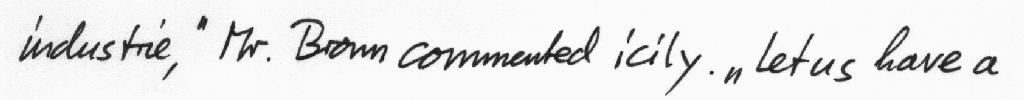

In [1]:
import requests
from PIL import Image

url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg"

image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

In [7]:
image.size

(1024, 100)

In [5]:
from transformers import TrOCRProcessor

checkpoint = "microsoft/trocr-base-handwritten"
# TODO This will issue a warning.
#      Set FeatureExtractor manually; see test/preprocesssor_config.json
#
processor = TrOCRProcessor.from_pretrained(checkpoint)
processor.save_pretrained('test')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [6]:
# TODO Find out what this function does exactly,
#      and how to show the resulting image, if at all
pixel_values = processor(image, return_tensors='pt').pixel_values
pixel_values.shape

torch.Size([1, 3, 384, 384])

In [14]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained(checkpoint)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
# TODO max_new_tokens?
translation_ids = model.generate(pixel_values)
translated_text = processor.batch_decode(translation_ids,
                                         skip_special_tokens = True)
translated_text

/home/jv/spiced/DeScribble/.venv/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['industry, " Mr. Brown commented icily. " Let us have a']